In [1]:
import numpy as np
import tensorflow as tf
import os
import sys
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath('../../'))

from sklearn.manifold import TSNE
import dl_style_transfer.from_shake_yelp as yelp
from dl_style_transfer.workspace.kate_new import Kate

seed = 1337
np.random.seed(seed)

/home/ryan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
x_train = yelp.get_ryans_strange_input()
x_train.shape

(1245235,)

In [3]:
kate = Kate(128, yelp.vocab_length(), 32, 6.26, load_model='../saved/Saved_Kate.ckpt')

Constructing KATE architecture...
Restoring Model...
INFO:tensorflow:Restoring parameters from /home/ryan/Programming/CDS/Yelp-FA17/dl_style_transfer/saved/Saved_Kate.ckpt
Model Restored!


In [4]:
def random_sample(data, num_samples):
    """Samples along first dimension of `data`"""
    idxs = np.random.choice(data.shape[0], size=num_samples, replace=False)
    return data[idxs]

In [5]:
sample = random_sample(x_train, 5000)

In [6]:
encoded = kate.encode(sample)
tsne = TSNE(n_components=2, verbose=1, perplexity=40)
tsne_results = tsne.fit_transform(encoded)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.021s...
[t-SNE] Computed neighbors for 5000 samples in 1.096s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 37.963764
[t-SNE] Error after 1000 iterations: 0.046418


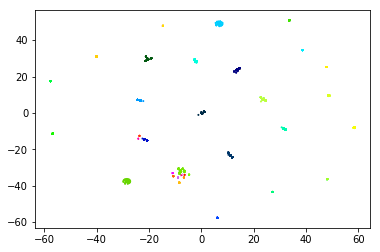

In [7]:
plt.tight_layout()
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=sample.astype(np.float), cmap=plt.get_cmap('gist_ncar'), s=1)
plt.show()

In [16]:
decoded = kate.decode(encoded)
print("KATE Accuracy:", np.mean(decoded == sample))

KATE Accuracy: 1.0
